In [1]:
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt
import seaborn as sns
from run_simulation import run_multiple_simulation

In [2]:
def plot_line(results, MC_position, fig, axs):
    MC_positions = [1, 50, 100]
    for i in range(4):
        # Calculate the mean results for the current index
        mean_results = np.mean(results[:, i, MC_position, :], axis=0)
        axs[i].plot(mean_results, label=fr'MC length = {MC_positions[MC_position]}')
        axs[i].set_title(f'Simulation {i+1}') 

    axs[0].set_ylabel('Distance')
    axs[0].set_title('Linear Cooling Schedule') 
    axs[1].set_title('Geometric Cooling Schedule') 
    axs[2].set_title('Hybird Cooling Schedule') 
    axs[3].set_title('Inverse Cooling Schedule') 
    for ax in axs:
        ax.set_xlabel('Iterations')
        ax.grid(True)
        ax.legend()

    plt.tight_layout()

def Welch_test(results_1,results_2): 
    mean_1 = np.mean(results_1)
    mean_2 = np.mean(results_2)
    var_1 = np.var(results_1, ddof=1)
    var_2 = np.var(results_2, ddof=1)
    t_stats = (mean_1-mean_2)/np.sqrt((var_1+var_2)/50)
    dof = ((var_1+var_2)/50)**2 / ((var_1**2+var_2**2)/50**2*49)
    pvalues = 1 - t.cdf(np.abs(t_stats), dof)

    return pvalues 

def plot_box(data): 
    plt.figure(figsize=(8, 6))  
    sns.boxplot(data=data, color='skyblue')
    print(max(data))  

    plt.title('Box Plot of local search algorithm')  
    plt.ylabel('Values')            
    plt.grid(axis='y')              

    plt.show()

In [3]:
dim = 280
num_i = 1000000
num_run = 50
results_hc, route = run_multiple_simulation(dimension=dim, num_i=num_i, num_run=num_run, alg_type='HC', load_file=True)
max_diff_dist = np.max((results_hc[:, :-1] - results_hc[:, 1:]).mean(axis=0))
initial_temps = [max_diff_dist/2, max_diff_dist, max_diff_dist*2]
print(f'initial temperatures are {initial_temps}')
results_sa_t0, _ = run_multiple_simulation(dimension=dim, num_i=num_i, num_run=num_run, alg_type='SA', initial_temperature=initial_temps[0], load_file=True)
results_sa_t1, _ = run_multiple_simulation(dimension=dim, num_i=num_i, num_run=num_run, alg_type='SA', initial_temperature=initial_temps[1], load_file=True)
results_sa_t2, _ = run_multiple_simulation(dimension=dim, num_i=num_i, num_run=num_run, alg_type='SA', initial_temperature=initial_temps[2], load_file=True)


Running Algorithm HC...
Successfully loaded data!
initial temperatures are [np.float64(28.244310986884447), np.float64(56.48862197376889), np.float64(112.97724394753779)]
Running Algorithm SA...
Successfully loaded data!
Running Algorithm SA...
Successfully loaded data!
Running Algorithm SA...
Successfully loaded data!


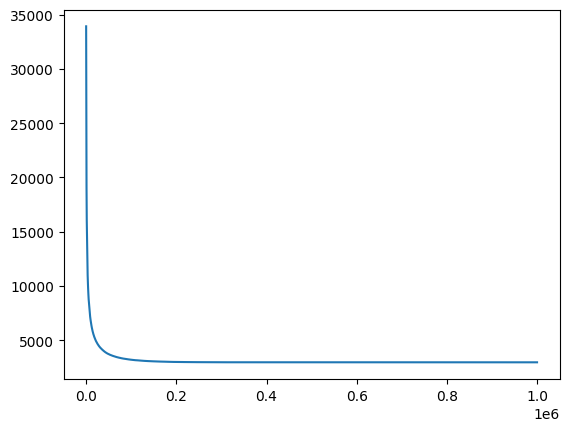

In [10]:
plt.plot(np.mean(results_hc, axis=0))

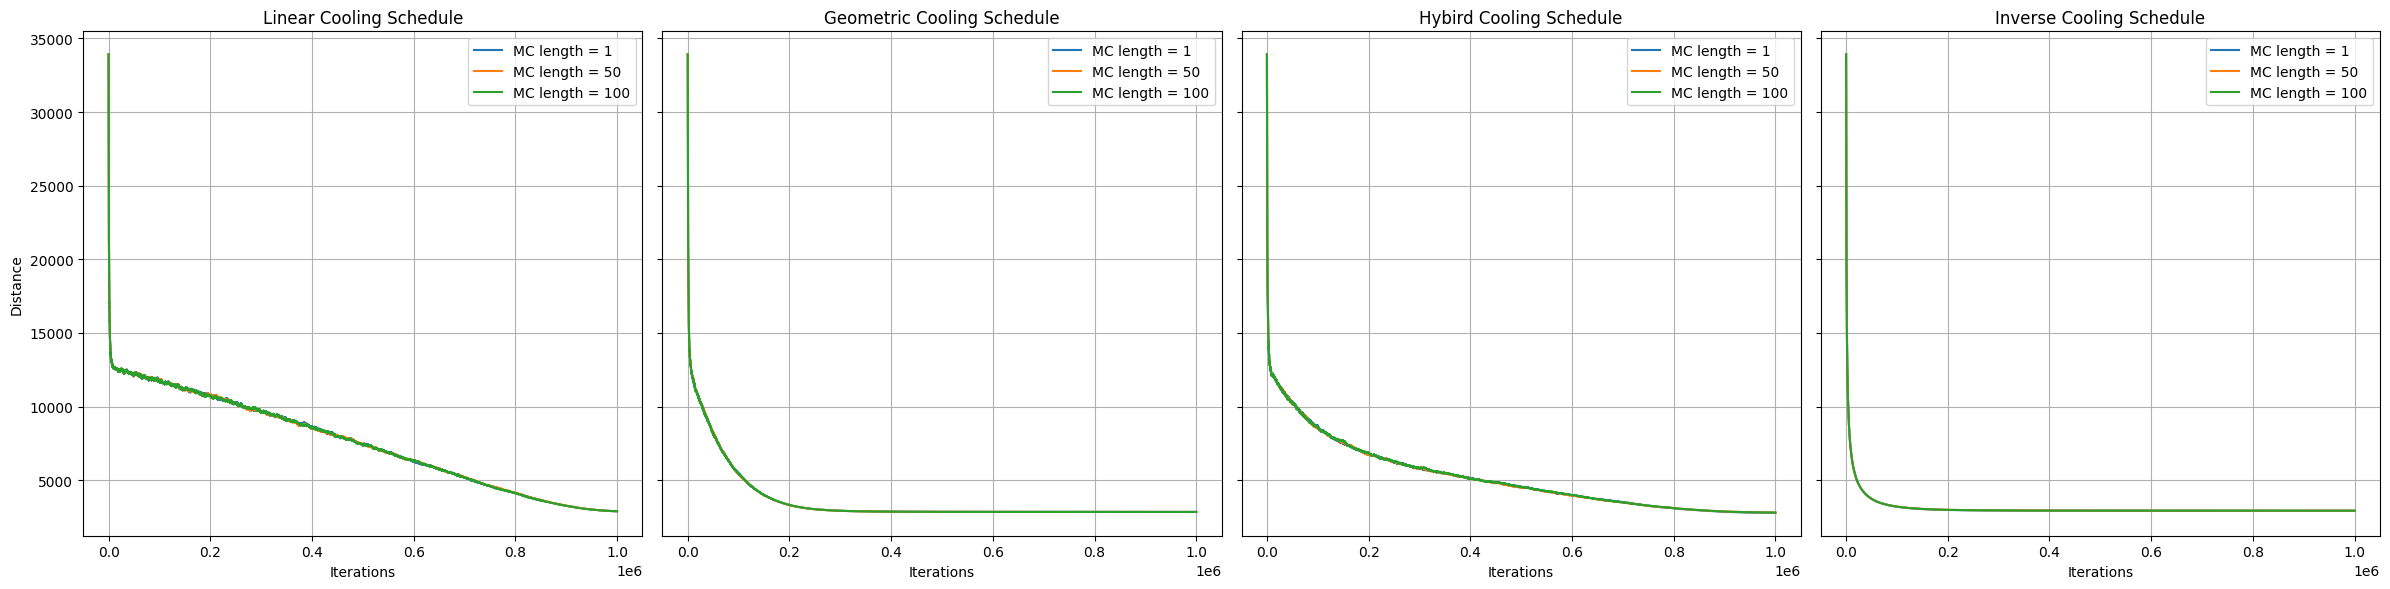

In [30]:
fig, axs = plt.subplots(1, 4, figsize=(24, 6), sharex=True, sharey=True)

plot_line(results_sa_t0, 0, fig, axs)
plot_line(results_sa_t0, 1, fig, axs)
plot_line(results_sa_t0, 2, fig, axs)

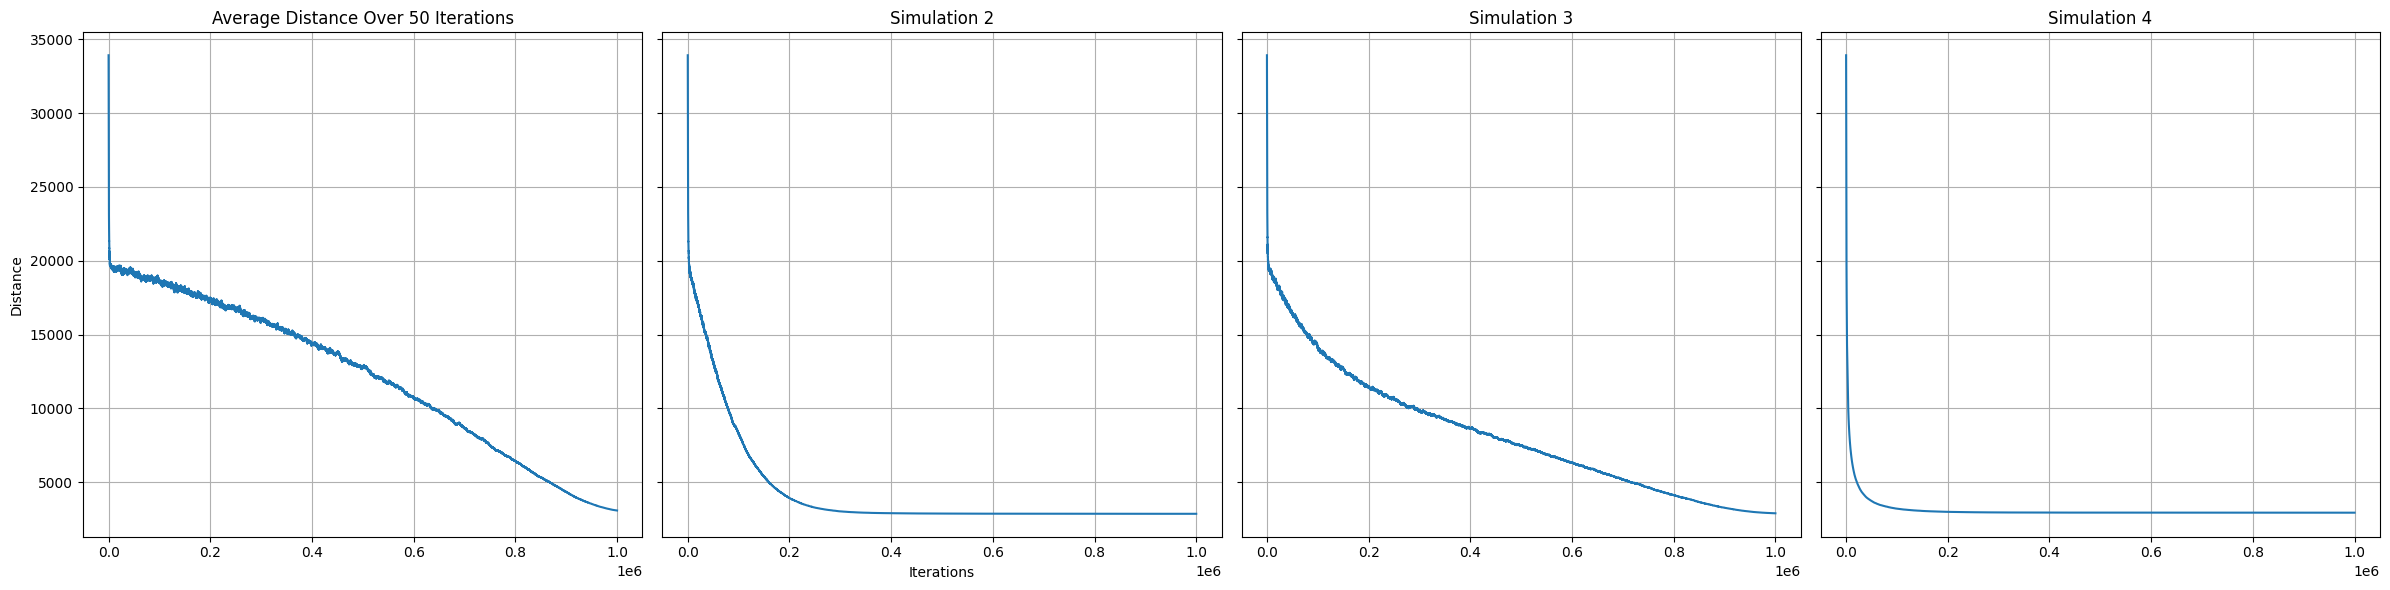

In [5]:
plot_line(results_sa_t1, 0)

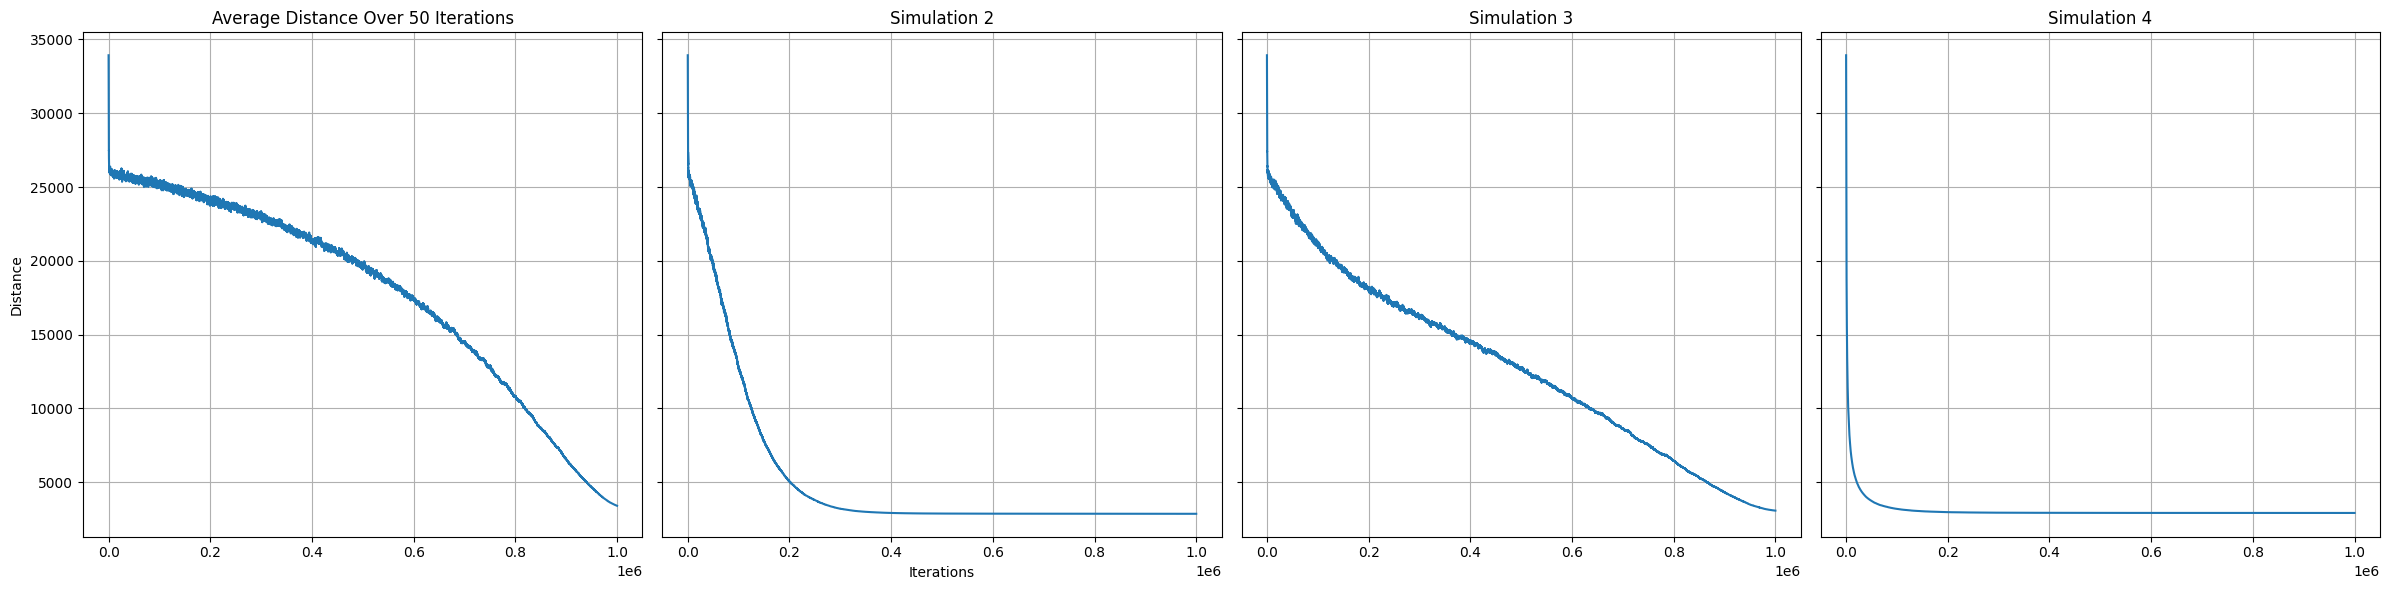

In [6]:
plot_line(results_sa_t2, 0)

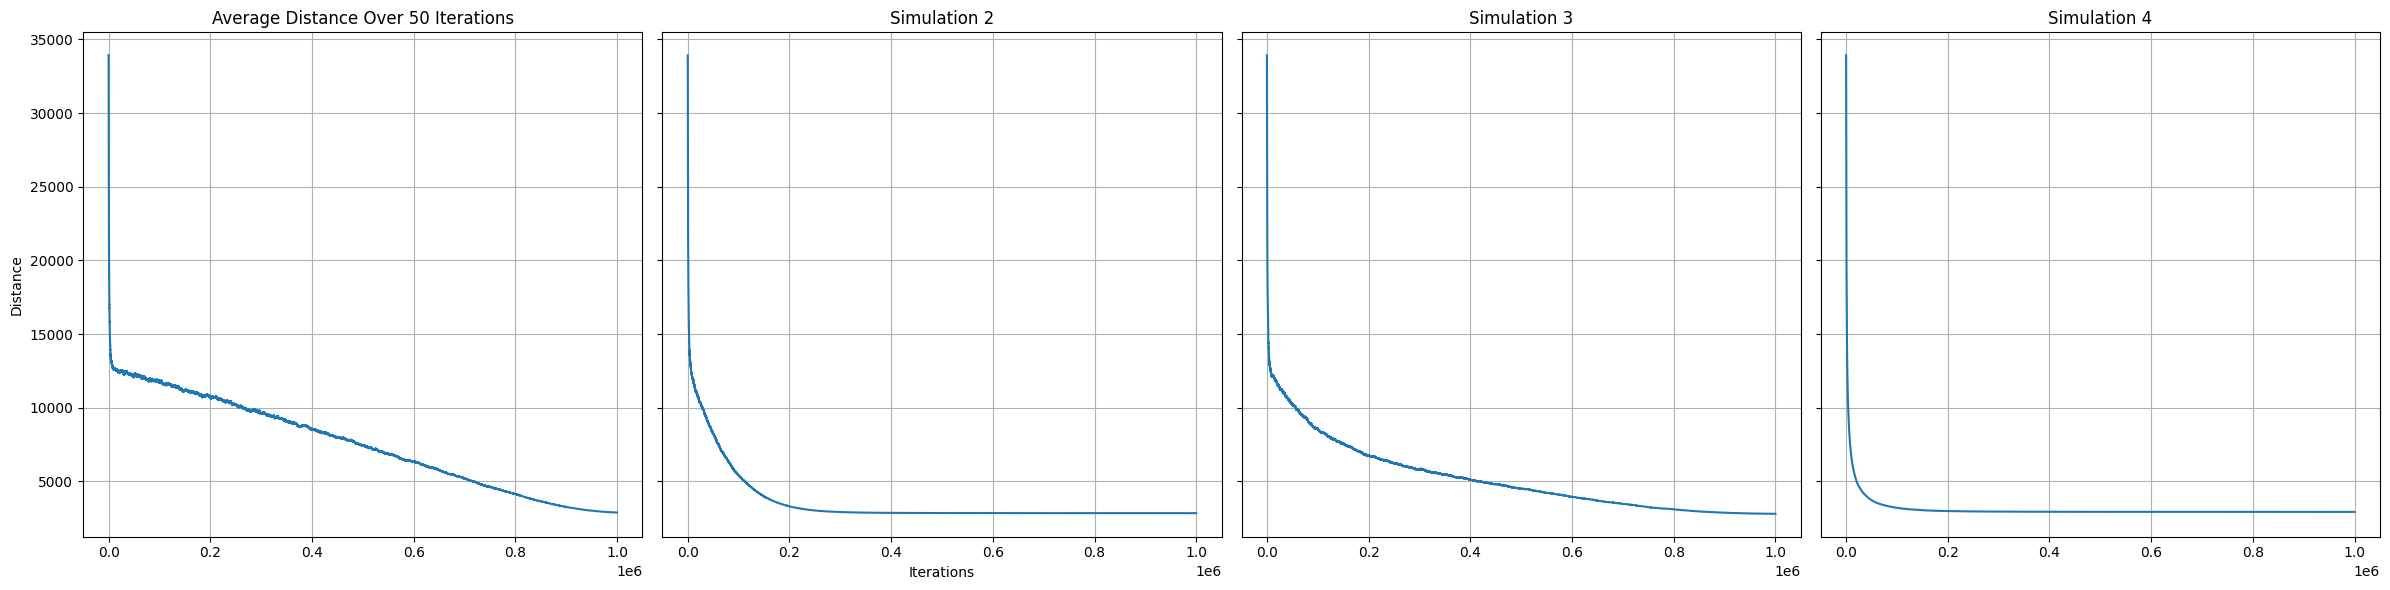

In [11]:
plot_line(results_sa_t0, 1)

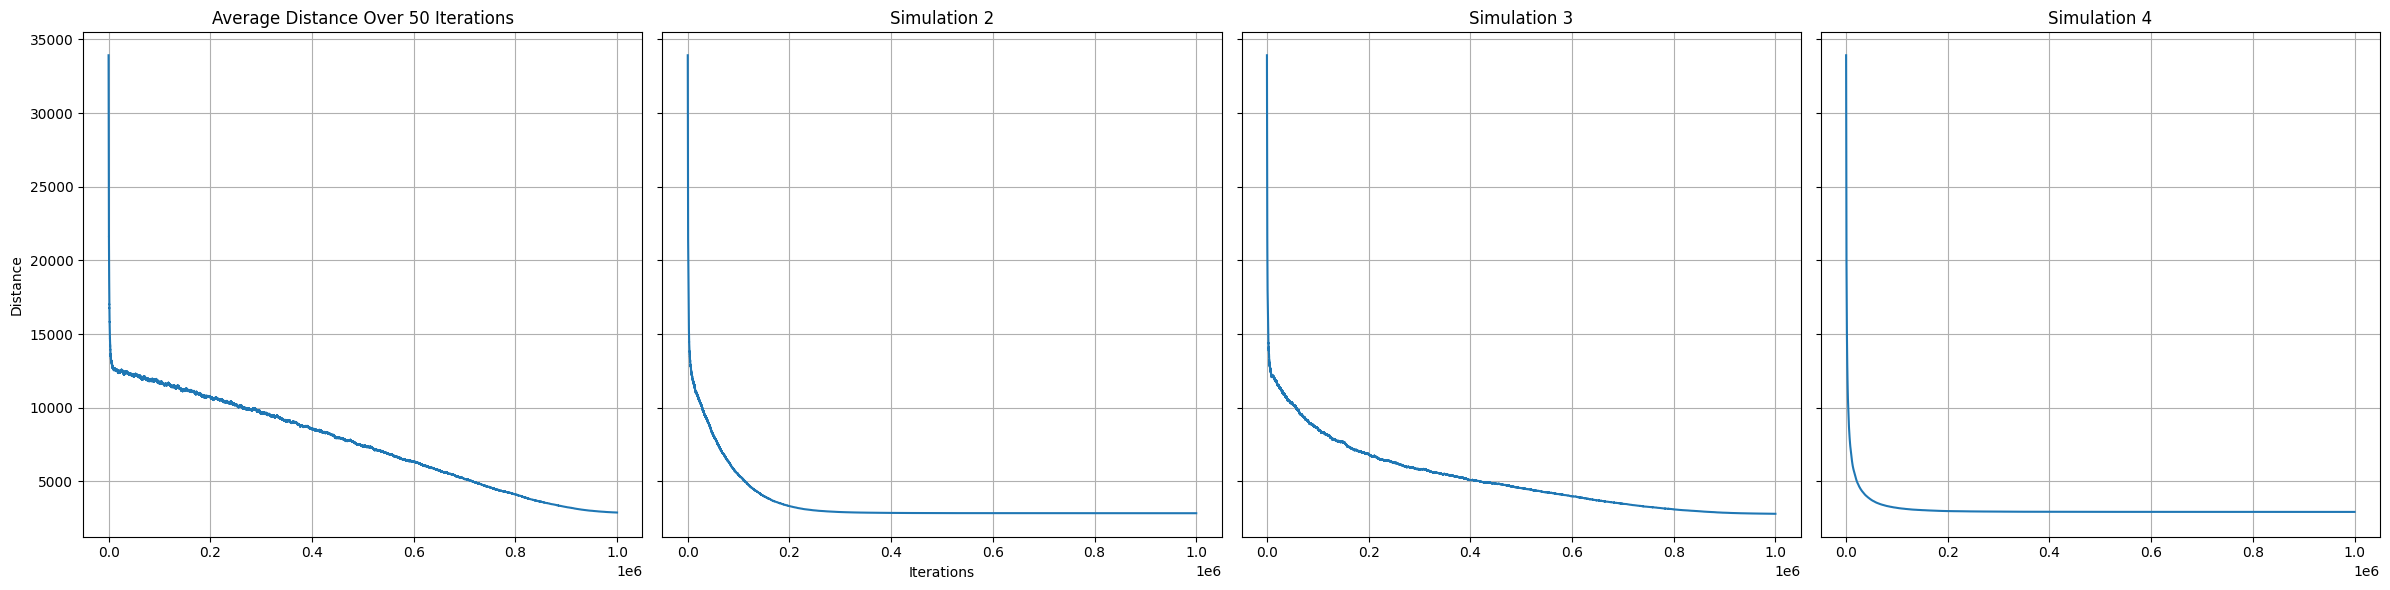

In [12]:
plot_line(results_sa_t0, 2)

In [4]:
dim = 442
num_i = 1000000
num_run = 50
results_hc, route = run_multiple_simulation(dimension=dim, num_i=num_i, num_run=num_run, alg_type='HC', load_file=True)
max_diff_dist = np.max((results_hc[:, :-1] - results_hc[:, 1:]).mean(axis=0))
initial_temps = [max_diff_dist/2, max_diff_dist, max_diff_dist*2]
print(f'initial temperatures are {initial_temps}')
results_sa_t0, _ = run_multiple_simulation(dimension=dim, num_i=num_i, num_run=num_run, alg_type='SA', initial_temperature=initial_temps[0], load_file=True)
results_sa_t1, _ = run_multiple_simulation(dimension=dim, num_i=num_i, num_run=num_run, alg_type='SA', initial_temperature=initial_temps[1], load_file=True)
results_sa_t2, _ = run_multiple_simulation(dimension=dim, num_i=num_i, num_run=num_run, alg_type='SA', initial_temperature=initial_temps[2], load_file=True)


Running Algorithm HC...
Successfully loaded data!
initial temperatures are [np.float64(413.05991291653135), np.float64(826.1198258330627), np.float64(1652.2396516661254)]
Running Algorithm SA...
Successfully loaded data!
Running Algorithm SA...
Successfully loaded data!
Running Algorithm SA...


EOFError: Ran out of input

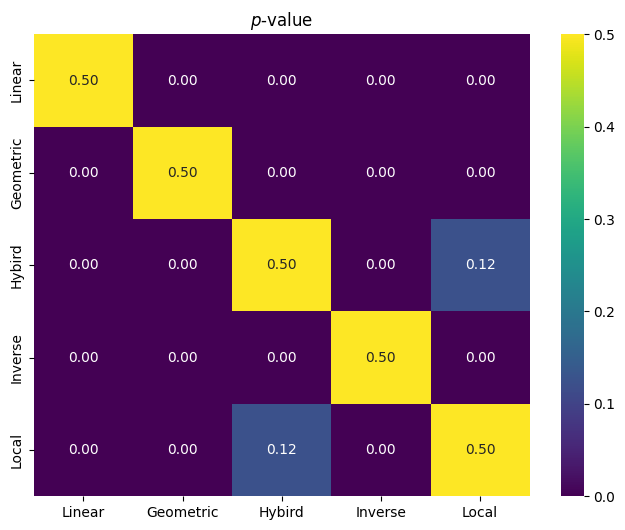

In [52]:
def p_value(results_1, results_2, results_3, results_4, results_5): 
    data = np.zeros((5,5))
    results = np.zeros((50,5))

    results[:,0] = results_1
    results[:,1] = results_2
    results[:,2] = results_3
    results[:,3] = results_4
    results[:,4] = results_5

    for i in range(5): 
        for j in range(5): 
            data[i,j] = Welch_test(results[:,i], results[:,j])

    plt.figure(figsize=(8, 6))
    x_labels = ['Linear', 'Geometric', 'Hybird', 'Inverse', 'Local']

    sns.heatmap(data, annot=True, fmt=".2f", cmap='viridis', cbar=True,
                xticklabels=x_labels, yticklabels=x_labels)

    plt.title('$p$-value')
    plt.show()   

p_value(results_sa_t0[:,0,0,-1],results_sa_t0[:,1,0,-1],results_sa_t0[:,2,0,-1],results_sa_t0[:,3,0,-1],results_hc[:,-1])

In [44]:
results_sa_t0[:,0,0,-1]

array([62957.92836664, 65124.06049908, 62533.14638619, 63119.09781192,
       63397.54408964, 63851.14564845, 64259.60641982, 64564.76064413,
       63589.62281153, 61889.21766381, 63206.96404031, 62689.98884921,
       62164.88534775, 62970.76737081, 62960.3359887 , 60957.79596515,
       62663.26526996, 62487.52362863, 63662.09351382, 63766.62312054,
       63982.78942604, 60525.15153707, 62108.69880867, 62580.31807821,
       63022.88023478, 61848.30847598, 64204.16696116, 64719.64432327,
       64641.22861406, 62644.11259333, 62073.1553792 , 62776.23189921,
       61825.64277683, 63117.60574314, 63712.04626166, 62253.56186233,
       63562.48983177, 62785.55897951, 63530.48165227, 63037.02244236,
       63545.81806517, 62242.29230522, 61755.92937621, 63333.21952541,
       63134.66560775, 62857.17887861, 62673.57021827, 63071.35177887,
       63542.56763683, 64858.58471011])

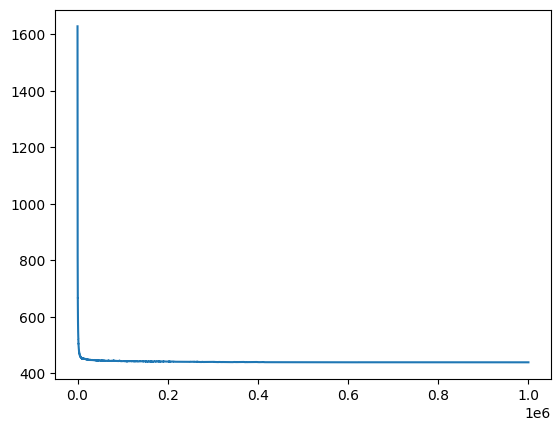

In [22]:
a = np.mean(results_442_lin, axis=0)
a.shape
plt.plot(a)

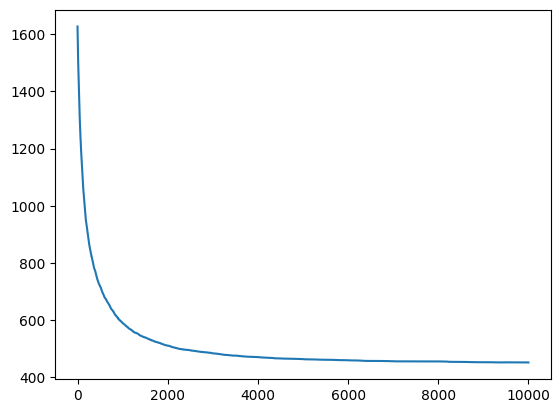

In [12]:
plt.plot(a)

In [22]:
results_hc_280, route = run_multiple_simulation(dimension=280, num_i=1000000, num_run=50, alg_type='HC', load_file=True)
results_hc_442, route = run_multiple_simulation(dimension=442, num_i=1000000, num_run=50, alg_type='HC', load_file=True)
box_result_280 = (results_hc_280[:, :-1] - results_hc_280[:, 1:]).mean(axis=0)
box_result_442 = (results_hc_442[:, :-1] - results_hc_442[:, 1:]).mean(axis=0)

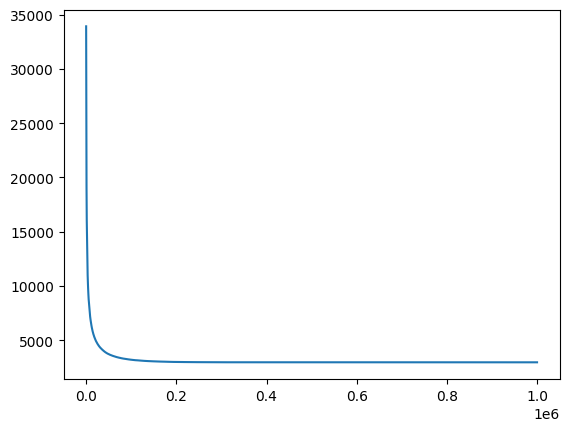

In [24]:
plt.plot(results_hc_280.mean(axis=0))

56.48862197376889


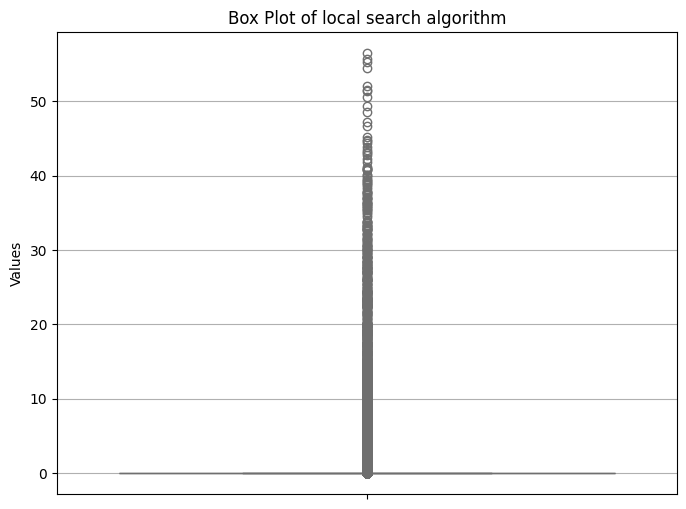

In [12]:
plot_box(box_result_280)

826.1198258330627


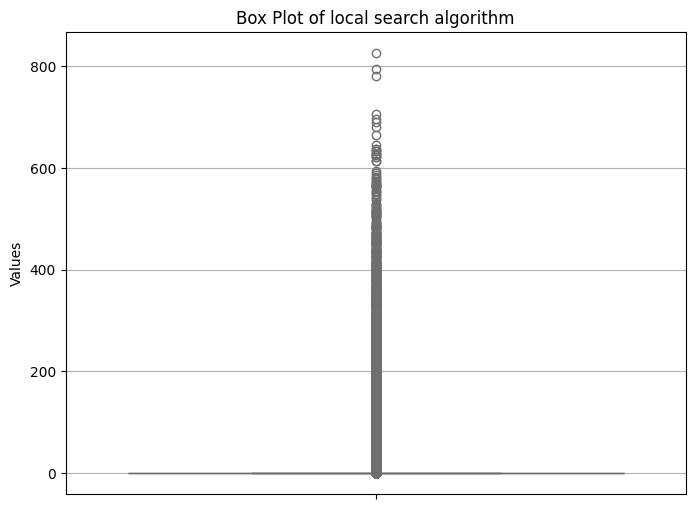

In [15]:
plot_box(box_result_442)

In [ ]:
mean=np.mean(results_sa_280[:,0,0,:], axis=0)

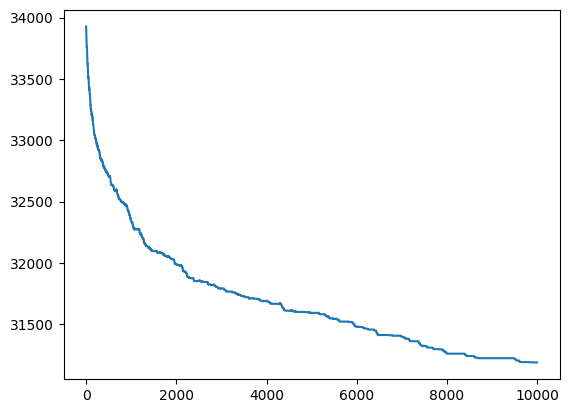

In [ ]:

plt.plot(mean)